In [16]:
from PIL import Image
from PIL import ImageEnhance
import numpy as np

width = 40
height = 20

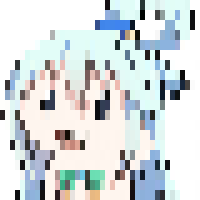

In [17]:
img = Image.open('akuya.jpg')
img = img.resize((width, height))
img.resize((200, 200))

In [18]:
#colors = [(0,0,0),(255,0,0),(0,255,0),(255,255,0),(0,0,255),(255,0,255),(0,255,255),(255,255,255),(128,128,128),(128,0,0),(0,128,0),(128,128,0),(0,0,128),(128,0,128),(0,128,128),(192,192,192)]
colors = [
    (0,0,0), (0,0,128), (0,128,0), (0,128,128),
    (128,0,0), (128,0,128), (128,128,0), (128,128,128),
    (128,128,128), (128,128,256), (128,256,128), (128,256,256),
    (256,128,128), (256,128,256), (256,256,128), (256,256,256),
]

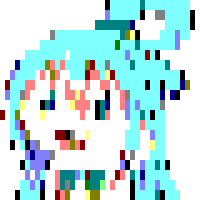

In [19]:
img = Image.open('akuya.jpg')
img = img.resize((width, height))
converter = ImageEnhance.Color(img)
img = converter.enhance(5)
data = []
for x in range(width):
    for y in range(height):
        min_distance = 255 ** 2 * 3
        min_color = 0
        for i, color in enumerate(colors):
            new_distance = np.sum((np.array(img.getpixel((x, y))) - np.array(color)) ** 2)
            if new_distance < min_distance:
                min_color = i
                min_distance = new_distance
        img.putpixel((x, y), colors[min_color])
        data.append(min_color)
img.resize((200, 200))

In [20]:
def fill(img, x, y):
    if x < 0 or y < 0 or x >= width or y >= height:
        return img
    if img.getpixel((x, y)) == (255, 255, 255):
        img.putpixel((x, y), (0, 0, 0))
        data[x * height + y] = 0
        fill(img, x+1, y)
        fill(img, x-1, y)
        fill(img, x, y+1)
        fill(img, x, y-1)
    return img

fill(img, 0, 0)
fill(img, 0, height - 1)
fill(img, width - 1, 0)
fill(img, width - 1, height - 1)

In [21]:
for y in range(height):
    for x in range(width):
        print(data[y * width + x], end=',')
    print('')

0,0,0,0,0,0,0,0,0,0,0,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,9,0,0,0,0,0,0,0,0,0,0,
0,0,0,0,0,0,0,9,11,11,11,11,11,11,0,0,0,0,0,0,0,0,0,0,0,0,1,11,11,11,11,6,9,11,0,0,0,0,0,0,
0,0,0,0,0,0,11,11,11,7,14,15,4,9,11,0,0,0,11,11,0,0,0,0,0,11,11,11,12,12,15,15,15,6,0,9,11,9,11,11,
0,0,0,0,0,11,11,11,12,15,15,15,15,15,9,1,9,15,9,11,0,0,0,0,0,11,11,15,15,15,15,15,15,15,7,9,9,9,11,11,
0,0,0,0,11,11,11,12,15,15,0,14,15,15,15,9,9,11,1,0,0,0,0,0,11,11,6,15,15,15,3,15,15,15,15,9,0,15,15,15,
0,0,0,7,11,11,12,6,12,3,1,15,15,15,15,7,15,15,15,15,0,0,0,11,11,11,11,12,15,15,15,15,15,4,15,15,15,12,12,4,
0,0,0,11,11,11,12,15,15,15,15,15,15,4,12,15,15,3,3,12,0,0,0,11,11,15,11,15,12,12,15,15,15,0,12,15,15,3,7,6,
0,0,0,11,11,11,11,11,15,12,14,15,15,7,6,15,15,3,3,15,0,0,0,11,11,11,11,11,15,14,12,15,15,15,12,15,15,9,15,15,
0,0,0,11,11,11,11,11,15,12,12,12,15,15,4,15,15,11,15,15,0,0,0,11,11,11,6,4,12,15,12,15,15,14,15,15,15,4,2,14,
0,0,0,11,11,11,4,12,15,15,15,15,15,15,15,15,15,3,3,6,0,0,3,11,11,11,11,12,15,15,0,0,